# Chapter 10 Notes: Introduction to Artificial Neural Networks with Keras

# From Biological to Artificial Neurons
 - McCulloch Pitts 1943 computational paper
## Logical Computatiosn with Neurons
 - Uses artificial binary neurons
 - Can perform basic logic functions like AND, OR, =, OR NOT 
 - Cannot do XOR
## The Perceptron 
 - Frank Rosenblatt 1957
 - Threshold Logic Units (TLU) make up the perceptron
 - inputs and outputs are scalars
 - each input is associated with a weight
 - each TLU computes a weighted sum of its inputs
    - z = $w_1x_1$ + $w_2x_2$ ... = **$x^T$w**
 - Then the TLU applies a step function to the result and outputs the result
    - $h_w$(**x**) = step(z) where z = **$x^T$w**
 - Types of step functions for Preceptrons:
    - Heaviside Step Function - 0 until z > 0, then 1
    - Sign Step Function - -1 for z < 0,  0 for z=0, 1 for z>0
 - A single TLU can perform linear binary classification. 
 - A perceptron is merely a single layer of TLUs and an input layer 
 - The input layer also contains a bias neuron which always outputs 1
 - Perceptrons can do multi-class classification
 - Computing the outputs of a fully connected perceptron layer:
    - $h_{W,b}$ = $\phi$(**XW** + **b**)
    - **X**  # instances by # features
    - **W** wieght matrix, # input neurons by # artificial neurons (TLUs) 
    - **b** bias vector contains weights between bias neuron and all the TLUs. len= # TLUs
    - $\phi$ activation function 
 - Learning Rule: reinforces the connections which help reduce the error
 - $w_{i,j}^{(next Step)}$ = w$_{i,j}$ + $\eta$($y_j$ - $\hat{y}_j$)$x_i$
     - $x_i$ ith input value for this instance
     - $\hat{y}_j$ out put of jth output neuron for this instance
     - $y_j$ tartget output for jth neuron for this instance
     - $\eta$ learning rate
 - Only works for linear problems
 - Perceptrons do not output a class probability
 - Perceptrons cannot perform XOR operations
 - MLP - Multi-Layer Perceptrons can do XOR and other thins

In [11]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] #length/width of petal 
y = (iris.target == 0).astype(np.int) #1 for setosas

iris.keys()

<ipython-input-11-b25aeda76ff5>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #1 for setosas


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


 ## The Multilayer Perceptron and Backpropagation
- MLPs are composed of an input layer, 1 or more hidden layers, and an output layer.
    - there is a bias TLU in each layer. This bias unit receives no input from previous layer.
- the input layer consists of pass through units and the other layers are TLUs
- Rumelhart, Hinton, and Williams 1986 introduced backpropagation
- **Backpropagation** - computes the gradient with respect to every single model parameter and for all the layers. Accomplishes this in two passes through the network. Finds how to tweak the weights in order to reduce the error. 
    - handles instances in minibatches (e.g. 32 instances)
    - an epoch is a single cycle through the whole dataset
    - On the *forward pass* the instances are passed through the network and all the intermediate outputs are saved. 
    - error is measured by using a loss function which compares the actual output vs the desired output
    - the chain rule is used to determine how much each output contributed to the error
    - the algorithm works backwards, determining how much of these error contributions came from each connection in the next lower layer. It propagates the error gradient backwards through the network. 
    - gradient descent performed by tweaking all connections in the network using the error gradients just computed. 
- Step function is replaced by a sigmoid function so there is a gradient to follow. $\sigma$ = $\frac{1}{1 + e^{-z}}$
    - this is an activation function like the hyperbolic tangent function or Rectified linear unit
- non-linear activation functions allow the MLP to approximate non-linear continuous functions. 

## Regression MLPs
- you need one output neuron per value you are trying to predict.
    - home value: 1 neuron, size of a rectangle: 2 neurons
- Usually you do not use an activation function for the output neurons. 
    - certain activation functions can bound the outputs within useful ranges
- MSE is the typical loss funciton
    - $\frac{1}{n}$$\sum\limits_{i=1}^{n}$(y-$\hat{y}$)$^2$

## Classification MLPs
- can output the estimated probability for binary classification with a single output neuron
- You need one output neuron per class you are predicting
    - Softmax activation funciton will ensure all the outputs sum to one. This is useful for exclusive multiclass classification
    - cross entropy loss function is useful here

# Implementing MLPs with Keras
- released in 2015
- relies on computation backend (TF, CNTK, theano)
- tensorflow has its own version of keras included. tf.keras
## Installing TensorFlow 2

In [1]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.8.0'

In [2]:
tf.__version__

'2.8.0-dev20211217'

## Building an Image Classifier
- Using fashion MNIST
### Using keras to Load the Dataset
- data represented as 28x28 arrays

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
import numpy as np
print(np.max(X_train_full))
print(np.min(X_train_full))

255
0


In [7]:
#split and scale the data (0 to 1)
#data already shuffled
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
[class_names[int(this_item)] for this_item in y_train[0:10]]

['Coat',
 'T-shirt/top',
 'Sneaker',
 'Ankle boot',
 'Ankle boot',
 'Ankle boot',
 'Coat',
 'Coat',
 'Dress',
 'Coat']

### Creating the model Using the Sequential API
- sequential api is the simplest form of nn single stack of layers
- add an input layer, preprocesses the data, reshaping the data to be 1D
- add a dense layer with relu. Also manages the bias term for each neuron
- add another layer, 100 neurons 
- add output layer, classes are exlusive 
- alternative syntax is to pass a list of layers when initializing the model

- dense layers produce a lot of parameters 
- more parameters introduces risk of overfitting

In [9]:
#initialize and build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
model.layers[1].name

'dense'

In [13]:
weights, biases = model.layers[1].get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [32]:
#can use kernel_initializer to alter initialization parameters 

### Compiling the model
- The compile() method specificies the loss function and optimizer to be used. 
- the model uses exlusive categorical classification with a sparse encoding (0-9 indeces instead of one-hot encoding classes). Therefore it will use sparse_categorical_crossentropy for the loss function. 
- since the model is a classifier, we will be looking at accuracy during evaluation

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Training and evaluating the model
- will use the fit() method
- will pass the optional validation dataset argument and keras will calculate loss at the end of each epoch. (useful to check for overfitting)
    - an alternate option is to set validation_split to a scaler of the fraction of the data to be used as a validation set. 
- the class_weight argument can account for some classes being over or underrepresented. Modifies the loss function. 
- the history object contains some useful resources
    - parameters used
    - list of epochs
    - dictionary of loss and extra metrics (history.history)

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7127 - accuracy: 0.7695 - val_loss: 0.5125 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 2s 952us/step - loss: 0.4831 - accuracy: 0.8321 - val_loss: 0.4628 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 2s 958us/step - loss: 0.4411 - accuracy: 0.8460 - val_loss: 0.4115 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 2s 966us/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.4053 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 2s 966us/step - loss: 0.3935 - accuracy: 0.8616 - val_loss: 0.3896 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8663 - val_loss: 0.3748 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3646 - accuracy: 0.8719 - val_loss: 0.3742 - val_a

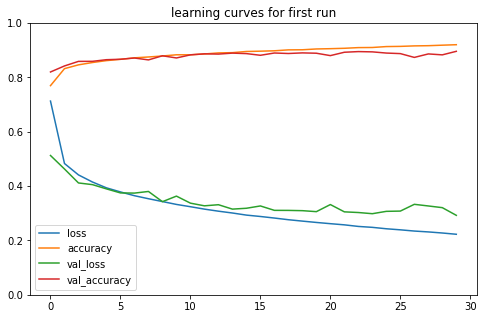

[<keras.layers.core.flatten.Flatten object at 0x000001492C8D1C40>, <keras.layers.core.dense.Dense object at 0x000001492C8D1BB0>, <keras.layers.core.dense.Dense object at 0x000001492C8EFF40>, <keras.layers.core.dense.Dense object at 0x000001494F86ED00>]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable param

In [30]:
#convert history dictionary to pandas dataframe and plot 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.title('learning curves for first run')
plt.show()
print(model.layers)
print(model.summary())
print(history.history)

In [42]:
from tensorflow.keras import regularizers

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 300)               235500    
                                                                 
 dense_33 (Dense)            (None, 100)               30100     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 10)               

Text(0.5, 1.0, 'learning curves for second run')

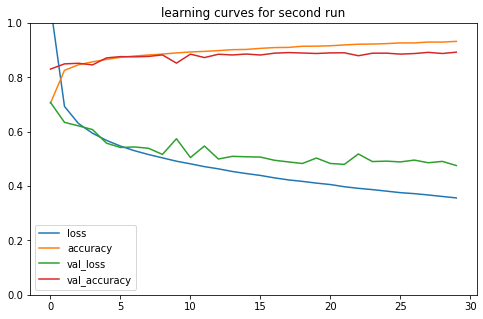

In [45]:
# hyperparameters we could tune: epoch#, batchsize, # layers, units per layer, 
#   activation functions

#initialize and build a second model to perform better
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model2.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model2.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model2.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))



#show model sumamry
model2.summary()

#set model hyperparameters
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.title('learning curves for second run')

In [38]:
#use the avaluate() method and test set to evaluate the model's performance
model.evaluate(X_test_full, y_test_full)

313/313 [==============================] - 0s 1ms/step - loss: 69.4314 - accuracy: 0.8360


[69.43136596679688, 0.8360000252723694]

In [39]:
model2.evaluate(X_test_full, y_test_full)

313/313 [==============================] - 0s 1ms/step - loss: 68.0978 - accuracy: 0.8292


[68.0977783203125, 0.829200029373169]

### Using the model to make predictions


In [48]:
X_new = X_test_full[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred = model.predict_class(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_class'

## Building a Regression MLP Using the Sequential API
- This time the ouput layer will have a single neuron with no activation funciton 
- Loss function = MSE
- Noisy dataset means we will add fewer layers and neurons to avoid over fitting

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
housing = fetch_california_housing()

#split into train/test/validation
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
#scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [58]:
model3 = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model3.compile(
    loss='mean_squared_error',
    optimizer='sgd')

history = model3.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))
                     
mse_test=model3.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred= model3.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2427491876199202816.0000 - val_loss: 36855718346752.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2565239996416.0000 - val_loss: 15727006.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1094629.2500 - val_loss: 8.2862
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.8094 - val_loss: 1.3424
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3391 - val_loss: 1.3421
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3391 - val_loss: 1.3425
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3390 - val_loss: 1.3442
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3392 - val_loss: 1.3433
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3390 - val_loss: 1.3432
Epoch 10/20
363/363 [=======================

In [63]:
mse_test


1.3075337409973145

In [65]:
print(y_pred)
print(y_test[:3])

[[2.0530384]
 [2.0530384]
 [2.0530384]]
[1.691 2.292 1.368]


### Building Complex models using the Functional API